## Example 1.2.1.

In [1]:
# Import modules first
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import beta, binom

In [2]:
# Define the distribution parameters to be plotted

p = np.linspace(0,1,300)
n = 16
y = 9
alpha = 5
betaa = 10

alphas = [alpha, y + 1, alpha + y]
betas = [betaa, n - y + 1, betaa + n - y]
linestyles = [':', '--', '-']
colors = ['blue', 'red', 'black']
labels = [r'Prior', r'Likelihood', r'Posterior']

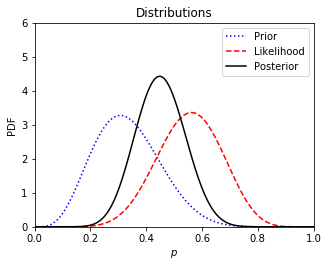

In [3]:
# Plot the distributions

fig, ax = plt.subplots(figsize=(5, 3.75))

for a, b, ls, col, lab in zip(alphas, betas, linestyles, colors, labels):
    dist = beta(a, b)
    
    plt.plot(p, dist.pdf(p), ls=ls, c=col, label =lab)
  

plt.xlim(0,1)
plt.ylim(0,6) 

plt.xlabel('$p$')
plt.ylabel('PDF')
plt.title('Distributions')

plt.legend()
plt.show()

In [4]:
# Cumulative Distribution : # Pr(x<= 0.5)

PrFreq = beta.cdf(0.5, alpha, betaa)
PrBayes = beta.cdf(0.5, alpha + n, betaa + y)

In [5]:
# Percentiles: Pr(0.05 <= x <= 0.95)

PercenFreq = beta.ppf([0.05, 0.95], alpha, betaa)
PercenBayes = beta.ppf([0.05, 0.95], alpha + n, betaa + y)

In [6]:
# Simulation

np.random.seed(199)
K = 1024      # Number of observations

RNpri = beta.rvs(alpha, betaa, size = K)
RNpost = beta.rvs(alpha + y, betaa + n - y + 1, size = K)

In [7]:
# Sample Cumulative Distribution: # Pr(X <=0.5)

SamplePrFreq = sum(RNpri <= 0.5)/K
SamplePrBayes = sum(RNpost <= 0.5)/K

In [8]:
# Sample Percentiles: Pr(0.5 <= x <= 0.95)

from scipy.stats.mstats import mquantiles
SamplePercenFreq = mquantiles(RNpri, prob = [0.05,0.95])
SamplePercenBayes = mquantiles(RNpost, prob = [0.05, 0.95])

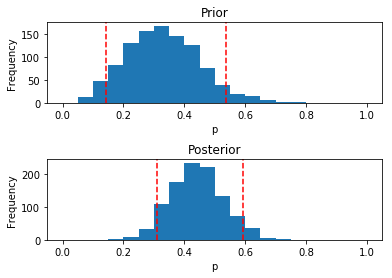

In [9]:
# Plotting

plt.subplot(211)
plt.hist(RNpri, bins = 20, range = (0,1))
for p in SamplePercenFreq:
    plt.axvline(p, c = 'red', ls = '--')
plt.title('Prior')
plt.xlabel('p')
plt.ylabel('Frequency')

plt.subplot(212)
plt.hist(RNpost, bins = 20, range = (0,1))
for p in SamplePercenBayes:
    plt.axvline(p, c = 'red', ls = '--')
plt.title('Posterior')
plt.xlabel('p')
plt.ylabel('Frequency')


plt.subplots_adjust(hspace = 0.7)
plt.savefig('BayesianRatio101b.png')

plt.show()

## Example 1.2.2.

In [10]:
p = np.linspace(1,0,500)
alpha, betaa = 5, 10
prior_p = beta.pdf(p, alpha, betaa)
n, y = 16, 3

alphas = [alpha + y*i for i in range(4)]
betas = [betaa + (n - y)*i for i in range(4)]
linestyles = ['-', '--', '-.',':']
colors = ['black', 'red', 'green', 'blue']
labels = ['Prior', 'Posterior 1', 'Posterior 2', 'Posterior 3']

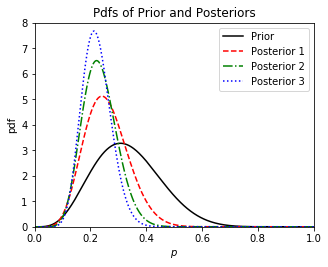

In [11]:
# Plotting

fig, ax = plt.subplots(figsize=(5, 3.75))

for a, b, ls, col, lab in zip(alphas, betas, linestyles, colors, labels):
    dist = beta(a, b)
    
    plt.plot(p, dist.pdf(p), ls=ls, c=col, label =lab)
  

plt.xlim(0,1)
plt.ylim(0,8) 

plt.xlabel('$p$')
plt.ylabel('pdf')
plt.title('Pdfs of Prior and Posteriors')

plt.legend()
plt.savefig('BayesianRatio102.png')
plt.show()

## Example 1.6.1.

In [12]:
np.random.seed(199)
N = 50

intercepts = [-0.06, -0.01, 0.25, 2.00]
slopes = [0.15, 0.10, 0.45, 2.85]
x = [a + b*np.random.randn(N,1) for a, b in zip(intercepts, slopes)]
epsilon = np.random.randn(N,1)
y = np.pi - 7*x[0] -1*x[1] - 15*x[2] - 2*x[3] + epsilon
X=[np.ones((50,1))]
for i in range(4):
    X.append(x[i])

In [13]:
X = np.transpose(np.asarray(X))
X.shape = (50, 5, )
y.shape = (50, )
K1 = X.shape[1]

In [15]:
# Frequentist

import statsmodels.api as sm
resultF = sm.OLS(y,X).fit()

piF = 1/(1+np.exp(-y))
OddsF = piF/(1-piF)
betaF = resultF.params

In [16]:
# Bayesian

beta0 = np.zeros((K1,))
Sigma0 = np.eye(K1)
InvSigma0 = np.linalg.inv(Sigma0)
SigmaB = np.linalg.inv(X.transpose() @ X + InvSigma0)
betaB = SigmaB @ (X.transpose() @ y + InvSigma0 @ beta0)

In [17]:
yB = []
OddsB = []

for n in range(N):
    xn = X[n,:].transpose()
    xnt = X[n,:]
    yB.append(xnt @ betaB)
    OddsB.append(np.exp(xnt @ betaB + 1/2 * xnt @ SigmaB @ xn + 1/2))

yB = np.array(yB)
OddsB = np.array(OddsB)
piB = 1/(1+np.exp(-yB.transpose()))
OddsB = OddsB.transpose()

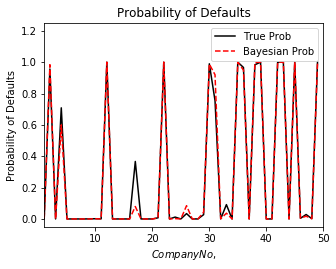

In [18]:
# Plotting

fig, ax = plt.subplots(figsize=(5, 3.75))

pis = [piF, piB]
linetypes = ['-', '--']
colors = ['black', 'red']
labels = ['True Prob', 'Bayesian Prob']

for pi, ls, col, lab in zip(pis, linetypes, colors, labels):
    plt.plot(pi, ls=ls, c=col, label =lab)
  
plt.xlim(1,N)
plt.ylim(-0.05,1.25) 

plt.xlabel('$Company No,$')
plt.ylabel('Probability of Defaults')
plt.title('Probability of Defaults')

plt.legend()
plt.savefig('DefaultProbability101.png')
plt.show()

In [5]:
# Real data tryout

import pandas as pd

df_stock = pd.read_csv('NYSE SP500 2016-2012.csv', 'Sheet1')
df_stock.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,",Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,""Sales, General and Admin."",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding"
0,"0,AAL,2012-12-31,3068000000.0,-222000000.0,-19..."
1,"1,AAL,2013-12-31,4975000000.0,-93000000.0,-272..."
2,"2,AAL,2014-12-31,4668000000.0,-160000000.0,-15..."
3,"3,AAL,2015-12-31,5102000000.0,352000000.0,-708..."
4,"4,AAP,2012-12-29,2409453000.0,-89482000.0,6000..."
